# 

Boston House Price Data 

Data from IBM Developer Skills Network (see below link)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
import requests
import csv
from io import StringIO

# Example of making a GET request
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'  # URL that returns CSV data
get_response = requests.get(url)

# Check if the request was successful
if get_response.status_code == 200:
    csv_data = get_response.text
    boston_df = pd.read_csv(StringIO(csv_data))
    print(get_response.status_code)
    print('Data loaded')
    

else:
    print(f"Error: {get_response.status_code}")

boston_df

200
Data loaded


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# Task 1 - Become familiar with the dataset

- CRIM: Per capita crime rate by town.
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: Proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- NOX: Nitric oxides concentration (parts per 10 million).
- RM: Average number of rooms per dwelling.
- AGE: Proportion of owner-occupied units built prior to 1940.
- DIS: Weighted distances to five Boston employment centers.
- RAD: Index of accessibility to radial highways.
- TAX: Full-value property tax rate per \$10,000.
- PTRATIO: Pupil-teacher ratio by town.
- LSTAT: Percentage of lower status of the population.
- MEDV: Median value of owner-occupied homes in \$1000s.

# Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels
Generate the following and explain your findings:
1. For the "Median value of owner-occupied homes" provide a boxplot
2. Provide a bar plot for the Charles river variable
3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
5. Create a histogram for the pupil to teacher ratio variable


## Task 2.1

Text(0.5, 0, 'Median Value of Homes ($1000s)')

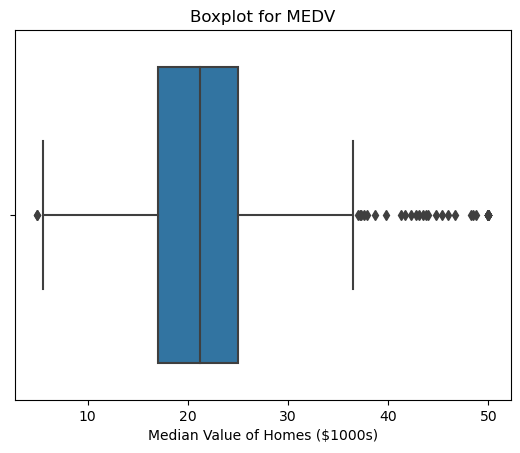

In [3]:
sns.boxplot(x=boston_df['MEDV'])

# show boxplot with title and x-label
pyplot.title('Boxplot for MEDV')
pyplot.xlabel('Median Value of Homes ($1000s)')


## Task 2.2

Text(0, 0.5, 'Frequency')

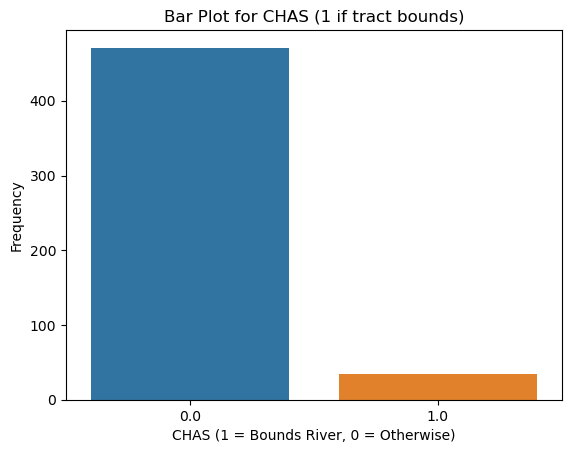

In [4]:
# CHAS is a dummy variable (categorical)
sns.countplot(x=boston_df['CHAS'])

# Add (x,y)-labels and title
pyplot.title("Bar Plot for CHAS (1 if tract bounds)")
pyplot.xlabel('CHAS (1 = Bounds River, 0 = Otherwise)')
pyplot.ylabel('Frequency')

## Task 2.3

In [5]:
# Discretize the AGE variable into three groups
max_age = boston_df['AGE'].max()
ages = [0, 35, 70, max_age+1]  
age_labels = ['35 and younger', 'Between 35 and 70', '70 and older']
boston_df['AGE_groups'] = pd.cut(boston_df['AGE'], bins = ages, labels = age_labels)

boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_groups
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,Between 35 and 70
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 and older


Text(0, 0.5, 'Median Home Value (in $1000s)')

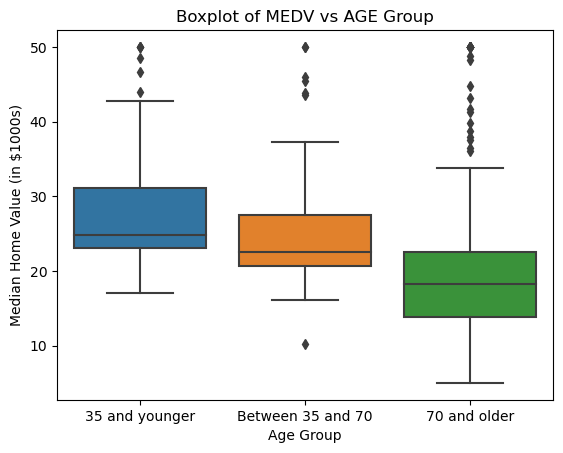

In [6]:
# Boxplot
sns.boxplot(x = 'AGE_groups', y = 'MEDV', data = boston_df)

# Add (x,y)-labels and title
pyplot.title('Boxplot of MEDV vs AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Home Value (in $1000s)')

## Task 2.4

Text(0, 0.5, 'Proportion of non-retail business acres per town \n INDUS')

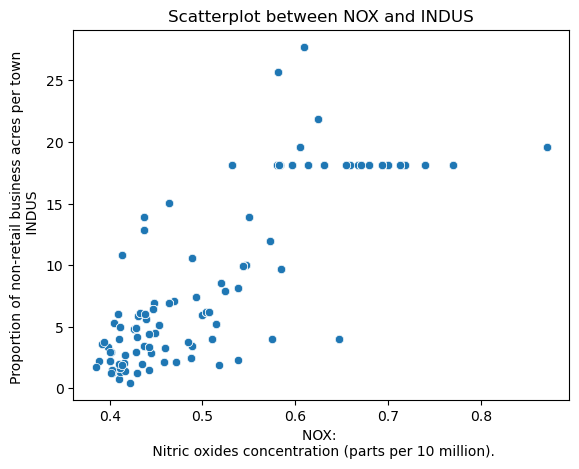

In [7]:
# Scatterplot
sns.scatterplot(x = 'NOX', y = 'INDUS', data = boston_df)

pyplot.title('Scatterplot between NOX and INDUS')
pyplot.xlabel('NOX: \n Nitric oxides concentration (parts per 10 million).')
pyplot.ylabel('Proportion of non-retail business acres per town \n INDUS')

## Task 2.5

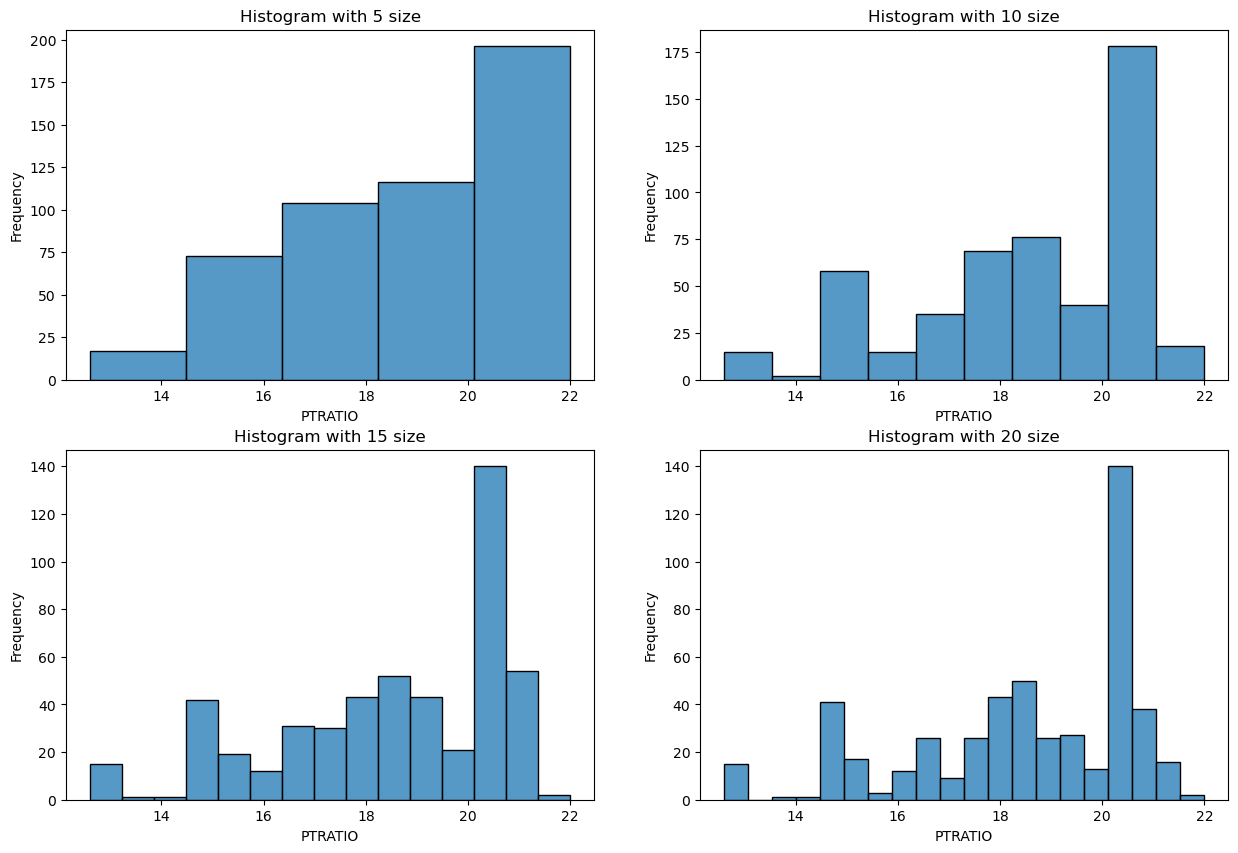

In [8]:
# List of different bin sizes
bin_size = [5, 10, 15, 20]

# Let's do it with subplots 
fig, axes = pyplot.subplots(2, 2, figsize = (15, 10))
axes = axes.flatten()  # for easier iteration

for i, bins in enumerate(bin_size):
    sns.histplot(boston_df['PTRATIO'], bins = bins, ax = axes[i])
    axes[i].set_title(f'Histogram with {bins} size')
    axes[i].set_xlabel('PTRATIO')
    axes[i].set_ylabel('Frequency')


# Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;
1. Is there a significant difference in median varue of houses bounded by the Charles river or not? (T-test for independent samples)
2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
- State your hypothesis.
- Use \alpha = 0.05
- Perform the test statistics
- state the conclusion from the test

## Task 3.1

In [9]:

# Assuming 'CHAS' is the column indicating whether the house is bounded by the Charles River (1 = yes, 0 = no)
# and 'MEDV' is the column with the median value of the houses
CHAS_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
CHAS_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the t-test for independent samples
t_stat, p_value = scipy.stats.ttest_ind(CHAS_1, CHAS_0)

print(f"T-statistic: {round(t_stat,4)}")
print(f"P-value: {round(p_value,4)}")

# Can we reject H_0?

# H0: there is no difference in the MEDV for bounded and unbounded to the river
# H1: there is a significant difference between MEDV for bounded and unbounded

# Check the significance
alpha = 0.05
if p_value < alpha:
    print('HO REJECTED')
    print("There is a significant difference ...")
else:
    print('HO NOT REJECTED')
    print("There is no significant difference ...")


T-statistic: 3.9964
P-value: 0.0001
HO REJECTED
There is a significant difference ...


## Task 3.2

In [10]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_groups
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,Between 35 and 70
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 and older


In [11]:

age_bins = [0, 25, 50, 75, 100]
age_labels = ['[0-25)%', '[25-50}%', '[50-75}%', '[75-100]%']
boston_df['AGE_bins'] = pd.cut(boston_df['AGE'], bins = age_bins, labels = age_labels)

boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_groups,AGE_bins
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Between 35 and 70,[50-75}%
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older,[75-100]%
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Between 35 and 70,[50-75}%
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Between 35 and 70,[25-50}%
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Between 35 and 70,[50-75}%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,Between 35 and 70,[50-75}%
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 and older,[75-100]%
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 and older,[75-100]%
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 and older,[75-100]%


In [12]:
# ANOVA
groups = [boston_df[boston_df['AGE_bins'] == label]['MEDV'] for label in age_labels]
f_stat, p_value = scipy.stats.f_oneway(*groups)

print(f"F-statistic: {round(f_stat,4)}")
print(f"p-value: {round(p_value,4)}")

# H0: no difference in MEDV for different AGE
# H1: significant difference in MEDV for at least one AGE category

alpha = 0.05
if p_value < alpha:
    print('HO REJECTED')
    print("There is a significant difference ... ")
else:
    print('HO NOT REJECTED')
    print("There is no significant difference ...")


F-statistic: 25.5498
p-value: 0.0
HO REJECTED
There is a significant difference ... 


## Task 3.3

In [13]:
corr_coeff, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation Coefficient is: {round(corr_coeff,4)}")
print(f"p-value: {round(p_value,4)}")

# test significance

# H0: no significanct relationship between NOX and INDUS
# H1: significant difference

alpha = 0.05
if p_value < alpha:
    print('HO REJECTED')
    print("There is a significant relationship between NOX and INDUS")
else:
    print('HO NOT REJECTED')
    print("There is no significant relationship ...")


Pearson correlation Coefficient is: 0.7637
p-value: 0.0
HO REJECTED
There is a significant relationship between NOX and INDUS


## Task 3.4

In [14]:
# OLS regression 
x = boston_df[['DIS']]  # independent variable
x = sm.add_constant(x)  # constant 
y = boston_df['MEDV']  # dependent variable

mymodel = sm.OLS(y, x).fit() 
print(mymodel.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        16:11:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [15]:
# Extract the coefficient, p-value, and t-value for DIS

coeff = mymodel.params['DIS']
p_value = mymodel.pvalues['DIS']
t_value = mymodel.tvalues['DIS']
r_squared = mymodel.rsquared

# Print the results
print(f"Coefficient for DIS: {round(coeff,4)}")
print(f"P-value for DIS: {round(p_value,4)}")
print(f"T-value for DIS: {round(t_value,4)}")
print(f"R-squared: {round(r_squared,4)}")


Coefficient for DIS: 1.0916
P-value for DIS: 0.0
T-value for DIS: 5.7948
R-squared: 0.0625
